 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
csvpath1=Path("Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_returns_df=pd.read_csv(csvpath1, index_col="Date",infer_datetime_format=True, parse_dates=True)

In [4]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns_df=whale_returns_df.dropna()
#Checking
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
csvpath2=Path("Resources/algo_returns.csv")
algo_returns_df=pd.read_csv(csvpath2, index_col="Date",infer_datetime_format=True, parse_dates=True)

In [7]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns_df=algo_returns_df.dropna()
#Checking
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
csvpath3=Path("Resources/sp_tsx_history.csv")
sp_tsx_history_df=pd.read_csv(csvpath3, index_col="Date",infer_datetime_format=True, parse_dates=True)

In [10]:
# Check Data Types
sp_tsx_history_df.dtypes[:]

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_tsx_history_df["Close"]=sp_tsx_history_df["Close"].astype('string')
sp_tsx_history_df["Close"]=sp_tsx_history_df["Close"].str.replace('$','')
sp_tsx_history_df["Close"]=sp_tsx_history_df["Close"].str.replace(',','')
sp_tsx_history_df["Close"]=sp_tsx_history_df["Close"].astype('float')
#Checking
sp_tsx_history_df.dtypes[:]

C:\Users\alexr\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp_tsx_returns_df=sp_tsx_history_df.pct_change()
sp_tsx_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [13]:
# Drop nulls
sp_tsx_returns_df=sp_tsx_returns_df.dropna()

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns_df.columns=['SP TSX'] #Note: could also use rename function.
sp_tsx_returns_df.head()

,SP TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns=pd.concat([whale_returns_df,algo_returns_df,sp_tsx_returns_df],axis=1,join='inner')
combined_returns.sort_index()
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date', ylabel='Daily Returns'>

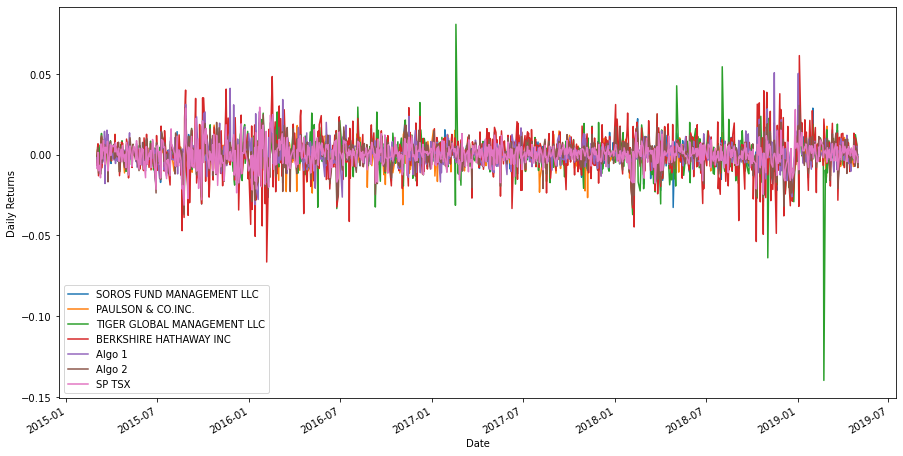

In [16]:
# Plot daily returns of all portfolios
combined_returns.plot(ylabel='Daily Returns',figsize=(15,8))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date', ylabel='Cumulative Returns'>

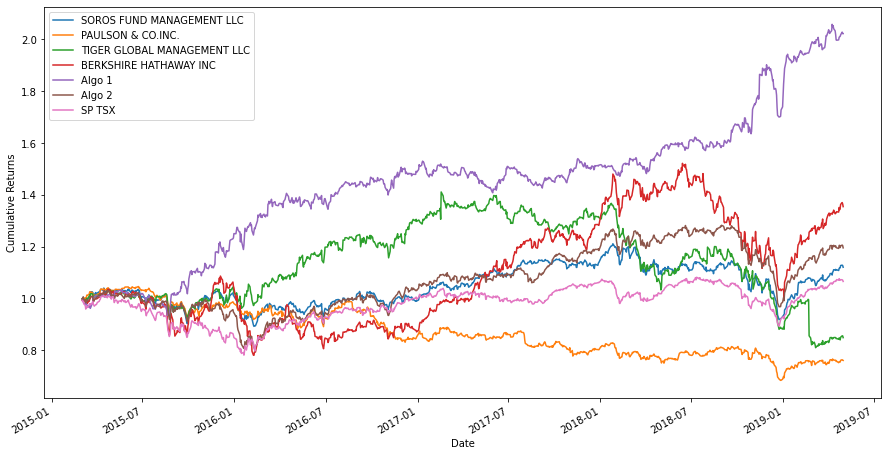

In [17]:
# Calculate cumulative returns of all portfolios
combined_cumulative_ret_df=(1 + combined_returns).cumprod()
# Plot cumulative returns
combined_cumulative_ret_df.plot(ylabel='Cumulative Returns',figsize=(15,8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:ylabel='Daily Returns'>

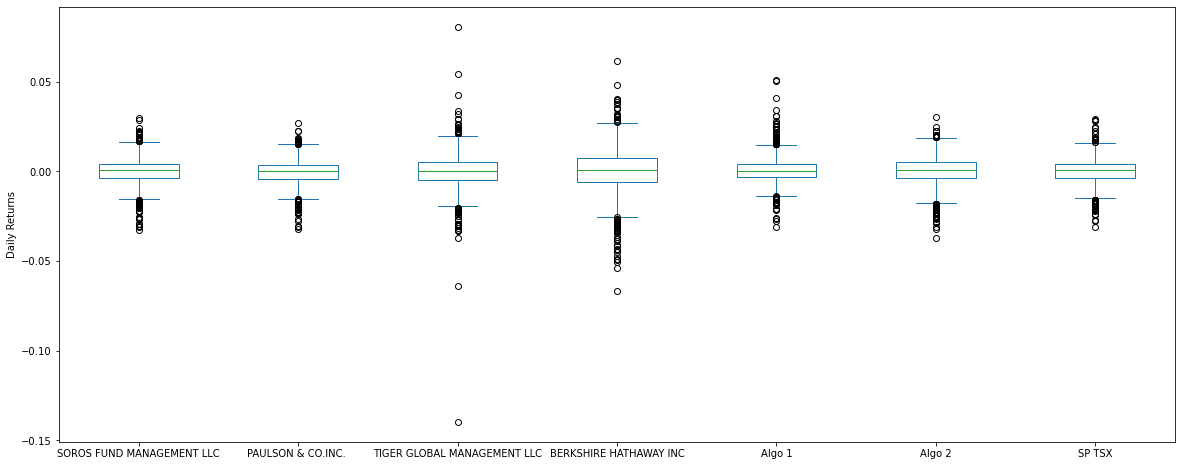

In [18]:
# Box plot to visually show risk
combined_returns.plot(kind='box',ylabel='Daily Returns',figsize=(20,8))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
combined_std_df=combined_returns.std()
combined_std_df.head(10)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP TSX                         0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_sp_tsx_std=combined_std_df['SP TSX'] #Already calculated above
# Determine which portfolios are riskier than the S&P TSX 60
risk=combined_std_df/daily_sp_tsx_std

print('The following are riskier than the SP TSX 60:')
risk.loc[risk.iloc[:]>1]


The following are riskier than the SP TSX 60:


SOROS FUND MANAGEMENT LLC      1.112794
TIGER GLOBAL MANAGEMENT LLC    1.547132
BERKSHIRE HATHAWAY INC         1.823317
Algo 1                         1.078860
Algo 2                         1.183702
dtype: float64

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_df=combined_std_df*np.sqrt(252)
print(f'The annualized standard deviations for the portfolios are as follows:\n{annualized_std_df}')



The annualized standard deviations for the portfolios are as follows:
SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP TSX                         0.111664
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date', ylabel='Standard Deviation'>

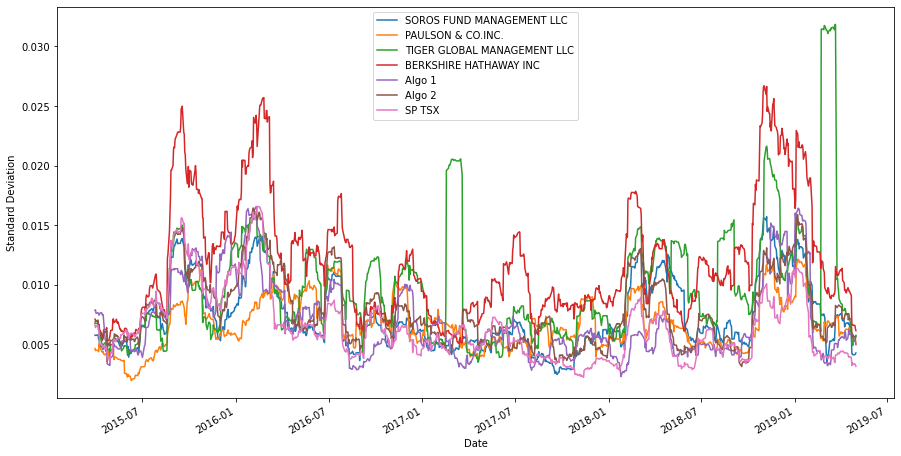

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_rolling_21=combined_returns.rolling(21).std()
# Plot the rolling standard deviation
std_rolling_21.plot(ylabel='Standard Deviation',figsize=(15,8))

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

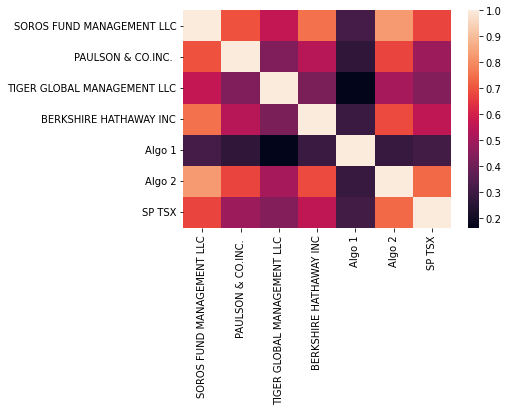

In [23]:
# Calculate the correlation
correlation_df=combined_returns.corr()
# Display de correlation matrix
display(correlation_df)
import seaborn as sns
sns.heatmap(correlation_df)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

The beta for Algo 1 against the S&P TSX 60  is 0.3347445908185686
The beta for Algo 2 against the S&P TSX 60  is 0.8728267344999598


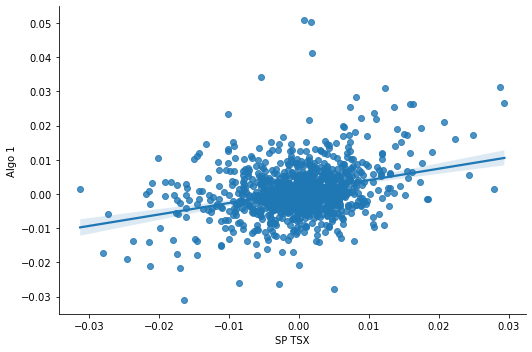

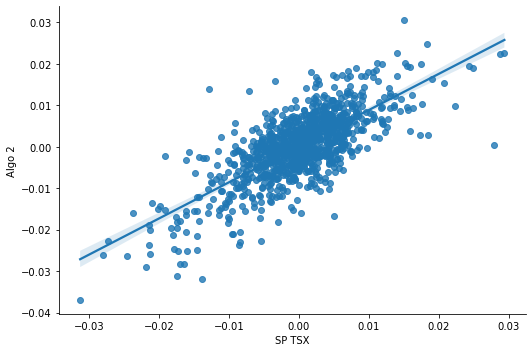

In [24]:
# Calculate covariance of a single portfolio
# Choosing Algo 1
algo1_cov=combined_returns['Algo 1'].cov(combined_returns['SP TSX'])

# Calculate variance of S&P TSX
sp_tsx_var=combined_returns['SP TSX'].var()
# Computing beta
beta_algo1=algo1_cov/sp_tsx_var

# Plot beta trend
sp_tsx_and_algo1_df=pd.concat([combined_returns['SP TSX'],combined_returns['Algo 1']],axis=1,join='inner')
sns.lmplot(x="SP TSX", y="Algo 1", data=sp_tsx_and_algo1_df, aspect=1.5, fit_reg=True)

#Checking Algo2
algo2_cov=combined_returns['Algo 2'].cov(combined_returns['SP TSX'])
beta_algo2=algo2_cov/sp_tsx_var
sp_tsx_and_algo2_df=pd.concat([combined_returns['SP TSX'],combined_returns['Algo 2']],axis=1,join='inner')
print(f'The beta for Algo 1 against the S&P TSX 60  is {beta_algo1}\nThe beta for Algo 2 against the S&P TSX 60  is {beta_algo2}')
sns.lmplot(x="SP TSX", y="Algo 2", data=sp_tsx_and_algo2_df, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date', ylabel='Standard Deviation'>

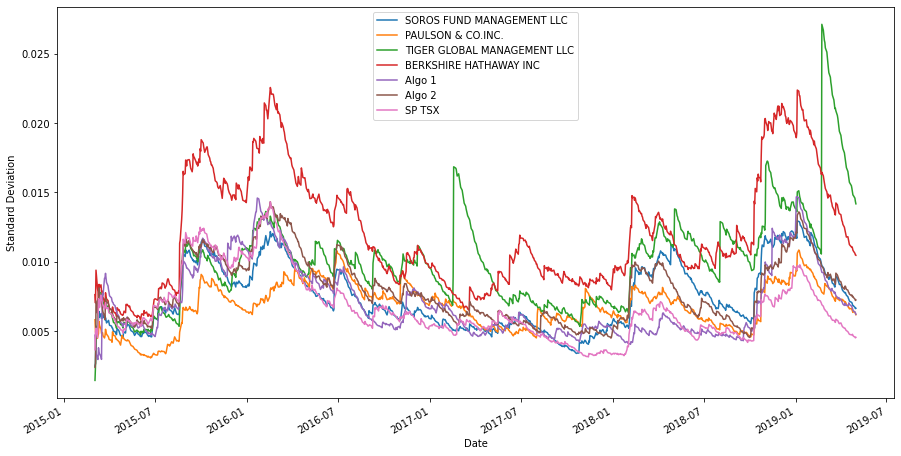

In [25]:
# Use `ewm` to calculate the rolling window
std_rolling_21_ewm=combined_returns.ewm(halflife=21).std()
# Plot the rolling standard deviation
std_rolling_21_ewm.plot(ylabel='Standard Deviation',figsize=(15,8))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
annualized_sharpe_ratios_df=(combined_returns.mean()*252)/annualized_std_df
annualized_sharpe_ratios_df

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP TSX                         0.195550
dtype: float64

<AxesSubplot:ylabel='Annualized Sharpe Ratios'>

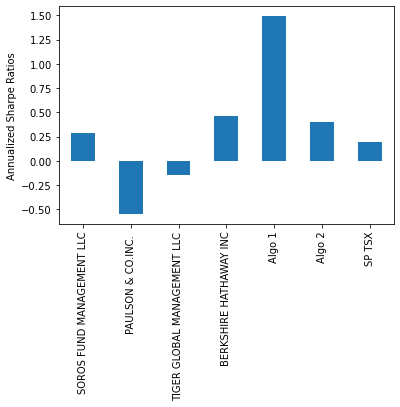

In [27]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios_df.plot(ylabel='Annualized Sharpe Ratios',kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Only Algo 1 outperforms both the S&P TSX 60 and all whale portfolios. Algo 2 is only outperformed by Berkshire Hathaway Inc. and Algo 1.

Cumulative returns of both Algos are seen to outperform the S&P TSX 60; Algo 1 by a larger margin than Algo 2. 

Algo 1's cumulative return also outperforms the four whale portfolios, but that for Algo 2 is observed to be outperformed by that from Berkshire Hathaway Inc.

Algo 1 also exhibits poor correlation with the S&P TSX 60 and all other portfolios, indicating more diversified holdings. In contrast, Algo 2 is more highly correlated with the S&P TSX 60 (r~0.8), as well as moderately correlated with the whale portfolios.

With regards to volatility, Algo 1 is seen to exhibit a beta = 0.33 against the S&P TSX 60, indicating its lower volatility than the market. In contrast, Algo 2 is shown to have a beta = 0.87 agaisnt the S&P TSX 60, indicating volatility more closely related to that of the market than Algo 1.

As consequence of its higher cumulative returns and lower volatility, Algo 1's sharpe ratio of 1.49 indicates much better performance than the market and any other portfolio.
Although Algo 2 appears to perfom well by showing higher cumulative returns than the market and most other portfolios, it  still exhibits a sharpe ratio of approximately 0.4, which is slightly lower than that for Bershire Hathaway Inc. (0.47).

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock: Barrick Gold
csvpath_a=Path('Resources/abx.csv',)
abx_df=pd.read_csv(csvpath_a,delimiter=";", index_col="Date",infer_datetime_format=True, parse_dates=True)
abx_df.head()

,Unnamed: 1
Date,
2014-05-28,17.04
2014-05-29,17.12
2014-05-30,17.60
2014-06-02,17.34
2014-06-03,17.44


In [29]:
# Reading data from 2nd stock: Canadian Tire
csvpath_b=Path('Resources/ctc.csv')
ctc_df=pd.read_csv(csvpath_b,delimiter=";", index_col="Date",infer_datetime_format=True, parse_dates=True)
ctc_df.head()

,Unnamed: 1
Date,
2014-02-06,142.00
2014-10-06,147.00
2014-12-06,143.35
2014-06-16,145.01
2014-06-18,147.00


In [30]:
# Reading data from 3rd stock: Royal Bank of Canada
csvpath_c=Path('Resources/rci.csv')
rci_df=pd.read_csv(csvpath_c,delimiter=";", index_col="Date",infer_datetime_format=True, parse_dates=True)
rci_df.head()

# Reading data from 4th stock: Rogers Communications Inc
csvpath_d=Path('Resources/ry.csv')
ry_df=pd.read_csv(csvpath_d,delimiter=";", index_col="Date",infer_datetime_format=True, parse_dates=True)

# Reading data from 5th stock: SNC Lavalin
csvpath_e=Path('Resources/snc.csv')
snc_df=pd.read_csv(csvpath_e,delimiter=";", index_col="Date",infer_datetime_format=True, parse_dates=True)

In [31]:
# Combine all stocks in a single DataFrame
custom_portfolio_df=pd.concat([abx_df,ctc_df,rci_df,ry_df,snc_df],axis=1,join='inner')
custom_portfolio_df.sort_index()
custom_portfolio_df.columns=['ABX','CTC','RCI','RY','SNC']
custom_portfolio_df

,ABX,CTC,RCI,RY,SNC
Date,,,,,
2014-06-10,17.72,189.00,40.96,69.01,54.34
2014-06-11,17.86,205.00,40.14,68.86,53.84
2014-06-16,18.37,145.01,40.27,69.33,54.28
2014-06-18,18.88,147.00,40.10,69.44,53.15
2014-06-23,19.49,146.01,40.05,70.17,53.31
...,...,...,...,...,...
2018-12-17,18.30,229.98,52.27,69.74,47.05
2018-12-18,18.71,217.19,52.50,69.55,46.89
2018-12-19,17.34,211.00,52.25,68.70,45.97


In [32]:
# Reset Date index
# I do not see the need for this.

In [33]:
# Reorganize portfolio data by having a column per symbol
#Already completed above.
custom_portfolio_df

,ABX,CTC,RCI,RY,SNC
Date,,,,,
2014-06-10,17.72,189.00,40.96,69.01,54.34
2014-06-11,17.86,205.00,40.14,68.86,53.84
2014-06-16,18.37,145.01,40.27,69.33,54.28
2014-06-18,18.88,147.00,40.10,69.44,53.15
2014-06-23,19.49,146.01,40.05,70.17,53.31
...,...,...,...,...,...
2018-12-17,18.30,229.98,52.27,69.74,47.05
2018-12-18,18.71,217.19,52.50,69.55,46.89
2018-12-19,17.34,211.00,52.25,68.70,45.97


In [34]:
# Calculate daily returns
cust_port_ret_df=custom_portfolio_df.pct_change()
# Drop NAs
cust_port_ret_df=cust_port_ret_df.dropna()
# Display sample data --> Not using sample function because the begining date must be checked.
cust_port_ret_df.head(10)

,ABX,CTC,RCI,RY,SNC
Date,,,,,
2014-06-11,0.007901,0.084656,-0.020020,-0.002174,-0.009201
2014-06-16,0.028555,-0.292634,0.003239,0.006825,0.008172
2014-06-18,0.027763,0.013723,-0.004222,0.001587,-0.020818
2014-06-23,0.032309,-0.006735,-0.001247,0.010513,0.003010
2014-06-24,-0.023089,0.000000,-0.007990,-0.003848,0.044082
2014-06-26,0.009979,0.003904,0.008054,0.007868,-0.005570
2014-06-30,0.016121,0.001160,0.004994,0.013911,0.013911
2014-07-10,0.011259,0.281090,-0.018137,0.030239,-0.008731
2014-07-11,0.048077,0.138298,-0.007085,-0.008697,0.007011


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/5, 1/5, 1/5,1/5,1/5]

# Calculate portfolio return
cust_portfolio_ret_total=(cust_port_ret_df.dot(weights))
cust_portfolio_ret_total_df=pd.DataFrame(cust_portfolio_ret_total) #converting list to dataframe
# Display sample data
cust_portfolio_ret_total_df.columns=['Custom Portfolio']
cust_portfolio_ret_total_df.head(10)


,Custom Portfolio
Date,
2014-06-11,0.012232
2014-06-16,-0.049168
2014-06-18,0.003607
2014-06-23,0.007570
2014-06-24,0.001831
2014-06-26,0.004847
2014-06-30,0.010019
2014-07-10,0.059144
2014-07-11,0.035521


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns_2=pd.concat([combined_returns,cust_portfolio_ret_total_df],axis=1,join='inner')
#Note: stock data in custom portfolio and combined returns dataframes before March 6, 2015 were dropped as part of the inner concat.

In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns_2=combined_returns_2.dropna()
combined_returns_2.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX,Custom Portfolio
Date,,,,,,,,
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.055579
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.013154
2015-03-16,0.007901,0.003583,0.007953,0.008055,-0.003395,0.004117,0.008910,0.028544
2015-03-17,0.002142,0.002928,-0.000687,0.000384,-0.002822,0.001274,0.002407,-0.010022
2015-03-18,0.009603,0.007513,0.009557,0.007854,0.014429,0.006269,0.004276,0.016777
2015-03-23,-0.000067,-0.000513,-0.000109,0.000591,0.015172,0.001519,0.000990,0.015122
2015-03-24,-0.002571,-0.004808,-0.003321,-0.001013,0.008758,-0.000885,0.008294,0.003287
2015-03-25,-0.006156,-0.008018,-0.011172,-0.014567,0.012464,-0.016862,-0.010071,-0.012469
2015-03-26,-0.002098,-0.000593,-0.001035,-0.001212,0.003446,-0.001979,-0.003990,-0.002300


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
combined_std_df=combined_returns_2.std()
annualized_std_df=combined_std_df*np.sqrt(252)
print(f'The annualized standard deviations for the portfolios are as follows:\n{annualized_std_df}')
#Note: Standard deviation for whale portfolios and S&P TSX60 are slightly different from those calculated before because return data was dropped as part of the inner concat when combining dataframes

The annualized standard deviations for the portfolios are as follows:
SOROS FUND MANAGEMENT LLC      0.129243
PAULSON & CO.INC.              0.106259
TIGER GLOBAL MANAGEMENT LLC    0.162024
BERKSHIRE HATHAWAY INC         0.211188
Algo 1                         0.122315
Algo 2                         0.132467
SP TSX                         0.118584
Custom Portfolio               0.264900
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date', ylabel='Standard Deviation'>

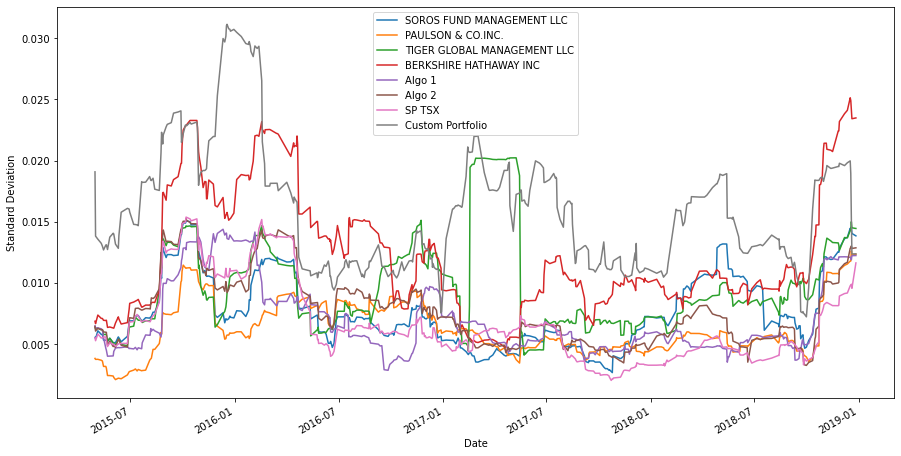

In [39]:
# Calculate rolling standard deviation
std_rolling_21=combined_returns_2.rolling(21).std()
# Plot the rolling standard deviation
std_rolling_21.plot(ylabel='Standard Deviation',figsize=(15,8))

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX,Custom Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.701469,0.616982,0.765184,0.356492,0.824442,0.672728,0.222806
PAULSON & CO.INC.,0.701469,1.000000,0.483397,0.538143,0.297421,0.693664,0.533595,0.157470
TIGER GLOBAL MANAGEMENT LLC,0.616982,0.483397,1.000000,0.487316,0.209268,0.549398,0.474296,0.169314
BERKSHIRE HATHAWAY INC,0.765184,0.538143,0.487316,1.000000,0.384854,0.674115,0.567590,0.196277
Algo 1,0.356492,0.297421,0.209268,0.384854,1.000000,0.323905,0.338410,0.143730
Algo 2,0.824442,0.693664,0.549398,0.674115,0.323905,1.000000,0.772099,0.269814
SP TSX,0.672728,0.533595,0.474296,0.567590,0.338410,0.772099,1.000000,0.386672
Custom Portfolio,0.222806,0.157470,0.169314,0.196277,0.143730,0.269814,0.386672,1.000000


<AxesSubplot:>

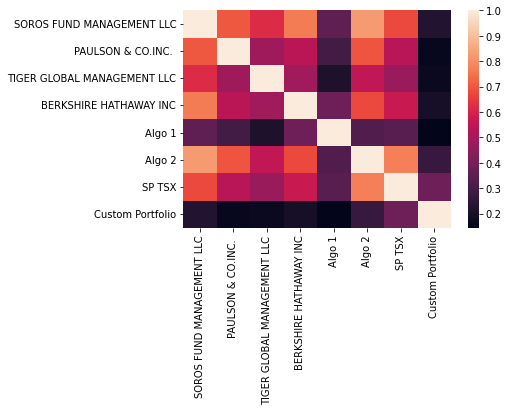

In [40]:
# Calculate and plot the correlation
correlation_df=combined_returns_2.corr()
# Display de correlation matrix
display(correlation_df)
import seaborn as sns
sns.heatmap(correlation_df)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date', ylabel='Beta'>

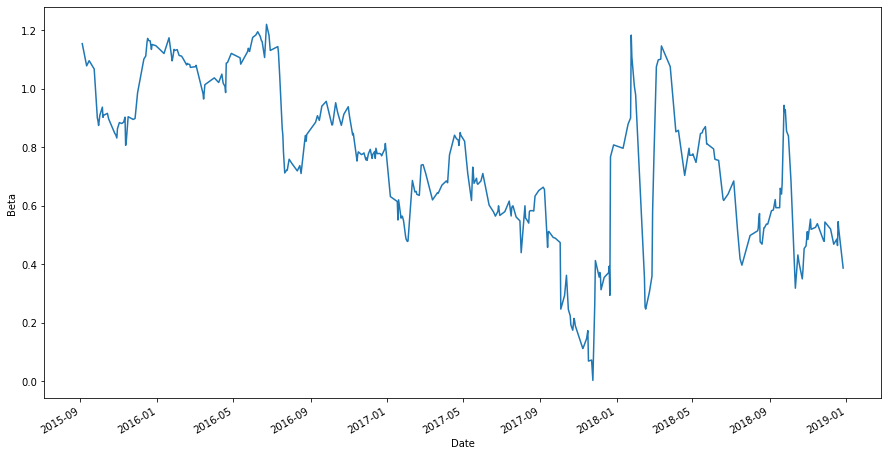

In [41]:
# Calculate and plot Beta
cust_port_rolling_cov=combined_returns_2['Custom Portfolio'].rolling(60).cov(combined_returns_2['SP TSX'])

# Calculate variance of S&P TSX
sp_tsx_rolling_var=combined_returns_2['SP TSX'].rolling(60).var()

# Computing beta
beta_cust_port=cust_port_rolling_cov/sp_tsx_rolling_var

# Plot beta trend
beta_cust_port.plot(ylabel='Beta',figsize=(15,8))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualized Sharpe Ratios
annualized_sharpe_ratios_df2=(combined_returns_2.mean()*252)/annualized_std_df
annualized_sharpe_ratios_df2

SOROS FUND MANAGEMENT LLC      0.368929
PAULSON & CO.INC.             -0.221969
TIGER GLOBAL MANAGEMENT LLC    0.820377
BERKSHIRE HATHAWAY INC         0.411998
Algo 1                         1.337845
Algo 2                         0.512066
SP TSX                         0.780779
Custom Portfolio               0.822496
dtype: float64

<AxesSubplot:ylabel='Annualized Sharpe Ratio'>

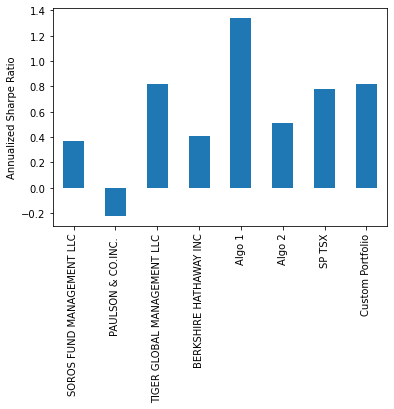

In [43]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios_df2.plot(kind='bar',ylabel='Annualized Sharpe Ratio')

### How does your portfolio do?

Before comparing, note that the combined dataframe of whale stocks and S&P TSX 60 was modified to match the timeframe of the Custom Portfolio in this second analysis. As a result, the statistics and ratios are changed in this second analysis. See TABLE 1 for a summary of the dataframe before and TABLE 2 after the analysis. Performance of each portfolio is also changed as result of the timeframe shift.

From the perspective of cumulative returns, the Custom Portfolio is observed to outperform all other portfolios, including the S&P TSX60 and Algos 1 and 2 (See FIGURE 1).
However, the Custom Portfolio also exhibits a higher volatility (higher spread in daily returns - see boxplot of standard deviation in FIGURE 2.

In comparison with the S&P TSX60, this volatility is observed to be higher than the market in months before September 2016, with Beta values > 1.0. After this, the volatility of the Custom Portfolio is observed to decrease when compared to the S&P TSX60 until January 2018, when beta jumps back up to > 1.0, gradually decreasing again thereafter (See beta trend above)

As a result of this high volatility, the overall performance of the Custom Portfolio is seen to be affected despite the higher cumulative return. As shown in the Sharpe Ratio plot above, the Custom Portfolio's Sharpe ratio is approximately 0.82, which is higher than or equal to the TSX60 and most other portfolios, with the exception of Algo 1.



In [44]:
print('TABLE 1')
display(combined_returns.describe())
print('TABLE 2')
display(combined_returns_2.describe())

TABLE 1


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,0.000141,-0.000241,-0.000099,0.000377,0.000713,0.000208,0.000087
std,0.007828,0.006982,0.010883,0.012826,0.007589,0.008326,0.007034
min,-0.032711,-0.032099,-0.139820,-0.066505,-0.030951,-0.036937,-0.031241
25%,-0.003662,-0.004038,-0.004784,-0.005725,-0.003139,-0.003892,-0.003668
50%,0.000529,0.000000,0.000295,0.000635,0.000143,0.000629,0.000587
75%,0.004330,0.003621,0.005324,0.007516,0.004038,0.005256,0.004237
max,0.029881,0.027032,0.080705,0.061341,0.050735,0.030509,0.029389


TABLE 2


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX,Custom Portfolio
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,0.000189,-0.000094,0.000527,0.000345,0.000649,0.000269,0.000367,0.000865
std,0.008142,0.006694,0.010207,0.013304,0.007705,0.008345,0.007470,0.016687
min,-0.032711,-0.032099,-0.032441,-0.066505,-0.026095,-0.036937,-0.031241,-0.067408
25%,-0.003884,-0.003964,-0.004558,-0.005227,-0.003241,-0.003778,-0.003199,-0.008146
50%,0.000699,0.000004,0.000927,0.000282,0.000069,0.000581,0.000653,0.000908
75%,0.004406,0.003442,0.005946,0.007465,0.003884,0.004958,0.004179,0.009716
max,0.024140,0.022372,0.080705,0.040576,0.041067,0.024831,0.028777,0.061874


Text(0.5, 1.0, 'FIGURE 1')

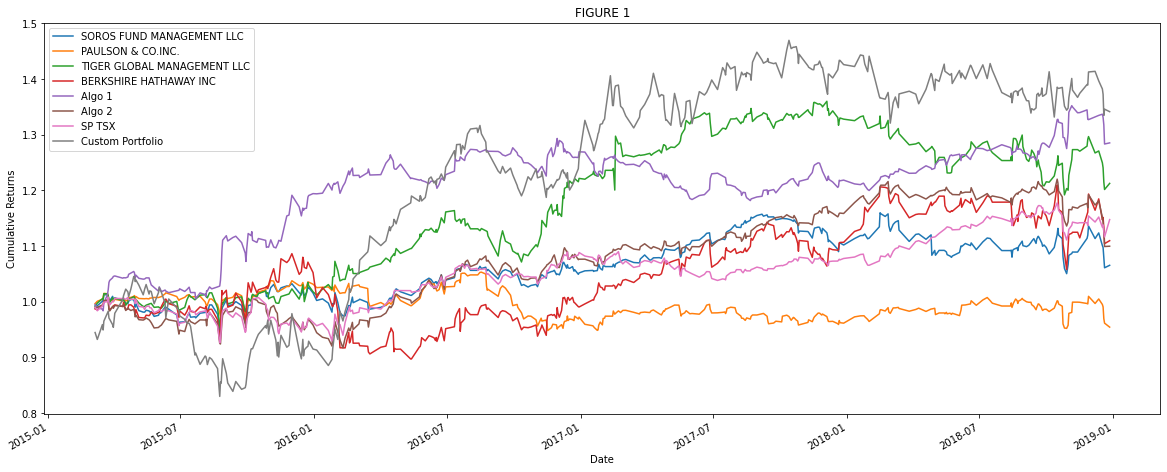

In [45]:
# Plot cumulative returns
import matplotlib.pyplot as plt
combined_cumulative_ret_df=(1 + combined_returns_2).cumprod()
combined_cumulative_ret_df.plot(ylabel='Cumulative Returns',figsize=(20,8))
plt.title('FIGURE 1')


Text(0.5, 1.0, 'FIGURE 2')

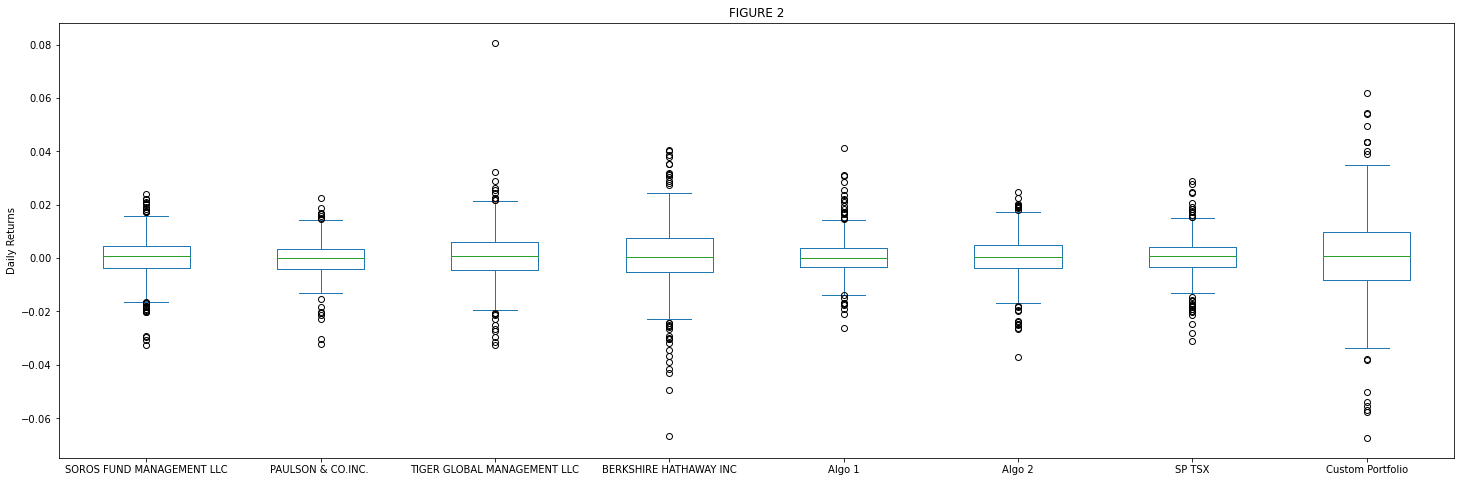

In [46]:
combined_returns_2.plot(kind='box',ylabel='Daily Returns',figsize=(25,8))
plt.title('FIGURE 2')